### Import dependencies

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
with_mask_files = os.listdir("data/with_mask")
# take first 5 and last 5 images
print(with_mask_files[:5])
print(with_mask_files[-5:])

['with_mask_1078.jpg', 'with_mask_1180.jpg', 'with_mask_1148.jpg', 'with_mask_3320.jpg', 'with_mask_810.jpg']
['with_mask_3307.jpg', 'with_mask_896.jpg', 'with_mask_412.jpg', 'with_mask_2253.jpg', 'with_mask_160.jpg']


In [3]:
without_mask_files = os.listdir("data/without_mask")
# take first 5 and last 5 images
print(without_mask_files[:5])
print(without_mask_files[-5:])

['without_mask_2915.jpg', 'without_mask_2056.jpg', 'without_mask_833.jpg', 'without_mask_3026.jpg', 'without_mask_2961.jpg']
['without_mask_2491.jpg', 'without_mask_964.jpg', 'without_mask_2537.jpg', 'without_mask_2836.jpg', 'without_mask_2581.jpg']


In [4]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


### Creating labels for mask and without mask

WITH MASK $\rightarrow$ 1

WITHOUT MASK $\rightarrow$ 0

In [5]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [6]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### Display some iamges

[]

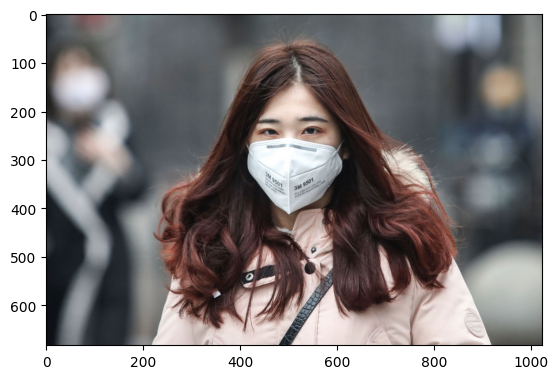

In [8]:
image = mpimg.imread("data/with_mask/with_mask_3439.jpg")
imgplot = plt.imshow(image)
plt.plot()

[]

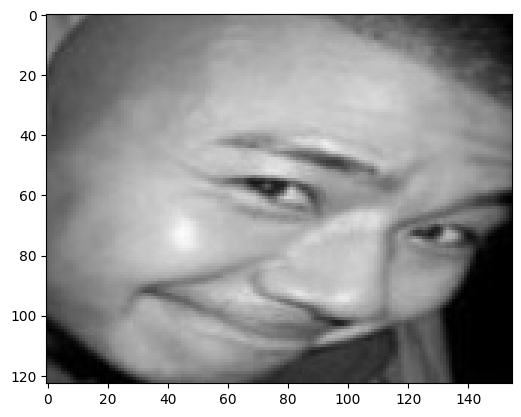

In [9]:
image = mpimg.imread("data/without_mask/without_mask_1224.jpg")
imgplot = plt.imshow(image)
plt.plot()

### Processing images

In [10]:
mask_path = "data/with_mask/"
without_mask_path = "data/without_mask/"

data = []

for img_file in with_mask_files:
    image = Image.open(mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)

for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)


In [11]:
len(data)

7553

In [12]:
type(data[0])

numpy.ndarray

In [13]:
data[0].shape

(128, 128, 3)

In [14]:
data[0]

array([[[114, 129, 150],
        [111, 127, 148],
        [110, 127, 147],
        ...,
        [123, 143, 227],
        [159, 176, 245],
        [179, 191, 250]],

       [[113, 128, 149],
        [110, 127, 147],
        [109, 126, 146],
        ...,
        [126, 146, 230],
        [156, 172, 243],
        [175, 188, 249]],

       [[112, 127, 148],
        [111, 128, 148],
        [111, 128, 148],
        ...,
        [129, 150, 229],
        [154, 172, 240],
        [169, 185, 242]],

       ...,

       [[219, 192, 135],
        [218, 192, 134],
        [218, 192, 134],
        ...,
        [ 24,  65, 155],
        [ 27,  68, 159],
        [ 25,  66, 158]],

       [[218, 189, 131],
        [216, 189, 130],
        [216, 191, 132],
        ...,
        [ 24,  65, 154],
        [ 26,  67, 156],
        [ 26,  67, 157]],

       [[219, 191, 131],
        [216, 189, 130],
        [217, 191, 132],
        ...,
        [ 22,  63, 151],
        [ 22,  63, 152],
        [ 22,  63, 153]]

In [15]:
X = np.array(data)
Y = np.array(labels)

In [16]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


### Split train and test

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [19]:
print(len(X_train)+len(X_test))

7553


In [20]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

### Building CNN

In [21]:
import tensorflow as tf
from tensorflow import keras

2024-11-03 23:46:57.378318: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-03 23:46:57.395051: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 23:46:57.551781: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-03 23:46:57.699447: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-03 23:46:57.787861: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [22]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

In [24]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 34s 184ms/step - acc: 0.7283 - loss: 0.7470 - val_acc: 0.8727 - val_loss: 0.2905
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 170ms/step - acc: 0.8778 - loss: 0.2811 - val_acc: 0.8777 - val_loss: 0.2810
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 153ms/step - acc: 0.8991 - loss: 0.2607 - val_acc: 0.8992 - val_loss: 0.2287
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 152ms/step - acc: 0.9131 - loss: 0.2175 - val_acc: 0.9223 - val_loss: 0.1811
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 26s 155ms/step - acc: 0.9394 - loss: 0.1605 - val_acc: 0.9289 - val_loss: 0.1817


### Evaluation

In [25]:
# loss, accuracy = model.evaluate(X_train_scaled, Y_train)
# print('Test Accuracy =', accuracy)

In [26]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - acc: 0.9123 - loss: 0.1808
Test Accuracy = 0.9199205636978149


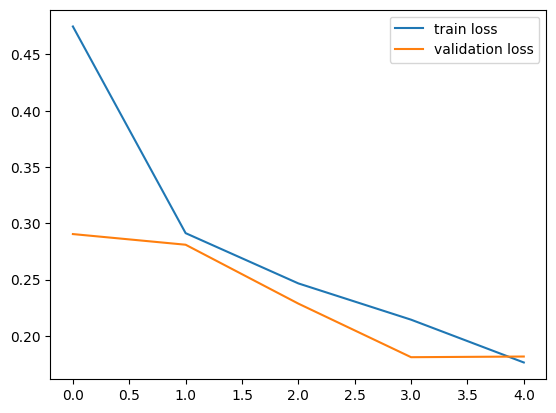

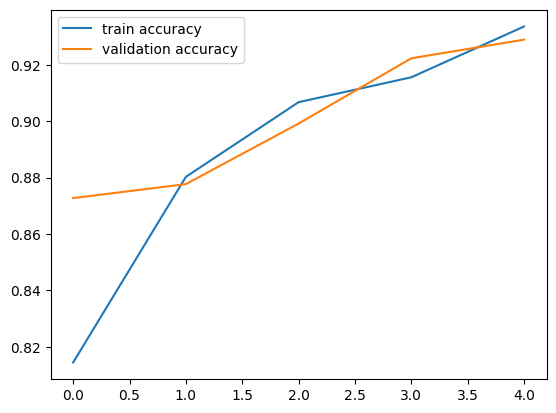

In [27]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

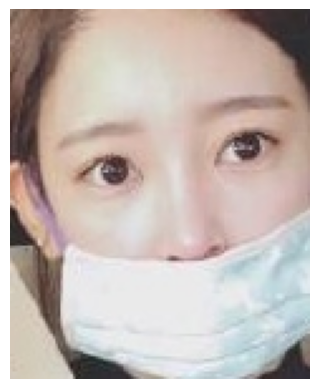

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.39616388 0.65012705]]
1
The person in the image is wearing a mask


In [46]:
input_image = cv2.imread("data/with_mask/with_mask_170.jpg")

# Hiển thị hình ảnh bằng matplotlib nếu không dùng được cv2.imshow()
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis("off")  # Ẩn trục tọa độ
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')